# Pt I
## Analyze and modify Data to suit our needs

In [1]:
import pandas as pd
#convert data into a df
df= pd.read_json("/kaggle/input/nb-data/cs39aa_project-main/NLPCSS-20-main/data/data.json")
df.head()

,source,title,event_id,adfontes_fair,adfontes_political,allsides_bias,content,misc
0,Fox News,"Trump blasts Howard Schultz, says ex-Starbucks...",0,bias,bias,From the Right,Obama administration alum Roger Fisk and Repub...,"{'time': '2019-01-28 16:10:44.680484', 'topics..."
1,USA TODAY,Trump blasts former Starbucks CEO Howard Schul...,0,bias,neutral,From the Center,WASHINGTON – President Donald Trump took a swi...,"{'time': 'None', 'topics': 'Election: Presiden..."
2,Washington Times,Mick Mulvaney: Trump to secure border 'with or...,0,bias,neutral,From the Right,Acting White House chief of staff Mick Mulvane...,"{'time': 'None', 'topics': 'White House', 'aut..."
3,Washington Times,Trump says 'we'll do the emergency' if border ...,0,bias,neutral,From the Right,President Trump repeated his vow Friday to dec...,"{'time': 'None', 'topics': 'White House, Polit..."
4,BBC News,Trump backs down to end painful shutdown tempo...,0,bias,neutral,From the Center,President Donald Trump has yielded to politica...,"{'time': '2019-01-26 00:00:00', 'topics': 'Whi..."


Explore df w/ pandas, as well as modify the data set

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7775 entries, 0 to 7774
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              7775 non-null   object
 1   title               7775 non-null   object
 2   event_id            7775 non-null   int64 
 3   adfontes_fair       7775 non-null   object
 4   adfontes_political  7775 non-null   object
 5   allsides_bias       7775 non-null   object
 6   content             7775 non-null   object
 7   misc                7775 non-null   object
dtypes: int64(1), object(7)
memory usage: 486.1+ KB
None


We'll only want to use allsides bias and content

In [3]:
df.drop(columns=['source','title','event_id','adfontes_fair','adfontes_political','misc'], inplace=True)
df.head()

,allsides_bias,content
0,From the Right,Obama administration alum Roger Fisk and Repub...
1,From the Center,WASHINGTON – President Donald Trump took a swi...
2,From the Right,Acting White House chief of staff Mick Mulvane...
3,From the Right,President Trump repeated his vow Friday to dec...
4,From the Center,President Donald Trump has yielded to politica...


In [4]:
#check for null entries
null_entries= df.isnull().sum()
print(null_entries, "\n")
#no null entries
df.info

allsides_bias    0
content          0
dtype: int64 



<bound method DataFrame.info of         allsides_bias                                            content
0      From the Right  Obama administration alum Roger Fisk and Repub...
1     From the Center  WASHINGTON – President Donald Trump took a swi...
2      From the Right  Acting White House chief of staff Mick Mulvane...
3      From the Right  President Trump repeated his vow Friday to dec...
4     From the Center  President Donald Trump has yielded to politica...
...               ...                                                ...
7770    From the Left  TAMPA, Fla. — Ann Romney will take to the podi...
7771   From the Right  She is a gracious warrior with a kind face, a ...
7772   From the Right  Republican VP pick on 'Special Report'\nMaking...
7773    From the Left  Paul Ryan said Monday he expects Ron Paul supp...
7774    From the Left  Tampa, Florida (CNN) \- As Rep. Ron Paul's thi...

[7775 rows x 2 columns]>

In [5]:
#analyze the data with pandas
print("The shape of the datafram is: ", df.shape ,"\n")
print("The unique vals for allsides bias is: \n", df.allsides_bias.unique(),"\n")
print("the value counts of the unique values is:")
df.allsides_bias.value_counts(normalize=True)

The shape of the datafram is:  (7775, 2) 

The unique vals for allsides bias is: 
 ['From the Right' 'From the Center' 'From the Left'] 

the value counts of the unique values is:


From the Left      0.473826
From the Right     0.366688
From the Center    0.159486
Name: allsides_bias, dtype: float64

## Tokenize df and Create Splits

tokenize the dataset

In [6]:
#import libs to tokenize df
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# Tokenize df
df['tokens_raw']= df['content'].apply(word_tokenize)
df.head()

,allsides_bias,content,tokens_raw
0,From the Right,Obama administration alum Roger Fisk and Repub...,"[Obama, administration, alum, Roger, Fisk, and..."
1,From the Center,WASHINGTON – President Donald Trump took a swi...,"[WASHINGTON, –, President, Donald, Trump, took..."
2,From the Right,Acting White House chief of staff Mick Mulvane...,"[Acting, White, House, chief, of, staff, Mick,..."
3,From the Right,President Trump repeated his vow Friday to dec...,"[President, Trump, repeated, his, vow, Friday,..."
4,From the Center,President Donald Trump has yielded to politica...,"[President, Donald, Trump, has, yielded, to, p..."


Get rid of stopwords

In [8]:
stops= set(stopwords.words('english'))
chars2remove= set(['.','!','/','?'])
df['tokens_raw']= df['tokens_raw'].apply(lambda x: [w for w in x if w not in stops])
df['tokens_raw']= df['tokens_raw'].apply(lambda x: [w for w in x if w not in chars2remove])
df['tokens_raw']= df['tokens_raw'].apply(lambda x: [w for w in x if not re.match('^#',w)])
df['tokens_raw']= df['tokens_raw'].apply(lambda x: [w for w in x if not re.match('^http',w)])
df['tokens_raw']= df['tokens_raw'].apply(lambda x: [w for w in x if not re.match('@',w)])
df.head()

,allsides_bias,content,tokens_raw
0,From the Right,Obama administration alum Roger Fisk and Repub...,"[Obama, administration, alum, Roger, Fisk, Rep..."
1,From the Center,WASHINGTON – President Donald Trump took a swi...,"[WASHINGTON, –, President, Donald, Trump, took..."
2,From the Right,Acting White House chief of staff Mick Mulvane...,"[Acting, White, House, chief, staff, Mick, Mul..."
3,From the Right,President Trump repeated his vow Friday to dec...,"[President, Trump, repeated, vow, Friday, decl..."
4,From the Center,President Donald Trump has yielded to politica...,"[President, Donald, Trump, yielded, political,..."


sort data by allsides_bias

In [9]:
#subset data by Right, Center, and Left leaning 
#Credit: nb_C_airline_tweets_take2.ipynb
df_right= df[df['allsides_bias'] == 'From the Right']
df_center= df[df['allsides_bias'] == 'From the Center']
df_left= df[df['allsides_bias'] == 'From the Left']

print("The shape of right leaning df: ", df_right.shape)
print("The shape of center leaning df: ", df_center.shape)
print("The shape of left leaning df: ", df_left.shape)

The shape of right leaning df:  (2851, 3)
The shape of center leaning df:  (1240, 3)
The shape of left leaning df:  (3684, 3)


lemmatize the tokens

In [10]:
#import libraries we will need to use
import nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

#create tokens from raw tokens, append tokens to dataframe
lemmatizer= WordNetLemmatizer()
df['tokens']= df['tokens_raw'].apply(lambda x: [lemmatizer.lemmatize(w, pos="v") for w in x])
df.head()

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


,allsides_bias,content,tokens_raw,tokens
0,From the Right,Obama administration alum Roger Fisk and Repub...,"[Obama, administration, alum, Roger, Fisk, Rep...","[Obama, administration, alum, Roger, Fisk, Rep..."
1,From the Center,WASHINGTON – President Donald Trump took a swi...,"[WASHINGTON, –, President, Donald, Trump, took...","[WASHINGTON, –, President, Donald, Trump, take..."
2,From the Right,Acting White House chief of staff Mick Mulvane...,"[Acting, White, House, chief, staff, Mick, Mul...","[Acting, White, House, chief, staff, Mick, Mul..."
3,From the Right,President Trump repeated his vow Friday to dec...,"[President, Trump, repeated, vow, Friday, decl...","[President, Trump, repeat, vow, Friday, declar..."
4,From the Center,President Donald Trump has yielded to politica...,"[President, Donald, Trump, yielded, political,...","[President, Donald, Trump, yield, political, p..."


make class index for df

In [11]:
classes= df.allsides_bias.unique().tolist()
class_tok2idx= dict((v,k) for k, v in enumerate(classes))
class_idx2tok= dict((k,v) for k, v in enumerate(classes))
print(class_tok2idx)
print(class_idx2tok)
df['label']= df['allsides_bias'].apply(lambda x: class_tok2idx[x])
df.head()

{'From the Right': 0, 'From the Center': 1, 'From the Left': 2}
{0: 'From the Right', 1: 'From the Center', 2: 'From the Left'}


,allsides_bias,content,tokens_raw,tokens,label
0,From the Right,Obama administration alum Roger Fisk and Repub...,"[Obama, administration, alum, Roger, Fisk, Rep...","[Obama, administration, alum, Roger, Fisk, Rep...",0
1,From the Center,WASHINGTON – President Donald Trump took a swi...,"[WASHINGTON, –, President, Donald, Trump, took...","[WASHINGTON, –, President, Donald, Trump, take...",1
2,From the Right,Acting White House chief of staff Mick Mulvane...,"[Acting, White, House, chief, staff, Mick, Mul...","[Acting, White, House, chief, staff, Mick, Mul...",0
3,From the Right,President Trump repeated his vow Friday to dec...,"[President, Trump, repeated, vow, Friday, decl...","[President, Trump, repeat, vow, Friday, declar...",0
4,From the Center,President Donald Trump has yielded to politica...,"[President, Donald, Trump, yielded, political,...","[President, Donald, Trump, yield, political, p...",1


Make 80-20 split

In [12]:
import random
random.seed(42)

df= df.copy()
assert df.shape[0] == 7775

indices= list(range(df.shape[0]))

random.shuffle(indices)

train_indices= indices[:6220]
test_indices= indices[6220:]

df_train= df.iloc[train_indices,:].copy()
print(f"df_train.shape: {df_train.shape}")

df_test= df.iloc[test_indices,:].copy()
print(f"df_test.shape: {df_test.shape}")
df_test.head()

df_train.shape: (6220, 5)
df_test.shape: (1555, 5)


,allsides_bias,content,tokens_raw,tokens,label
2886,From the Right,The speech will mark the beginning of Trump’s ...,"[The, speech, mark, beginning, Trump, ’, tour,...","[The, speech, mark, begin, Trump, ’, tour, acr...",0
4973,From the Right,MILAN (AP) — An Italian coast guard ship heade...,"[MILAN, (, AP, ), —, An, Italian, coast, guard...","[MILAN, (, AP, ), —, An, Italian, coast, guard...",0
7481,From the Right,After a long struggle with medical and legal p...,"[After, long, struggle, medical, legal, proble...","[After, long, struggle, medical, legal, proble...",0
2344,From the Left,When Republicans rolled out their tax reform p...,"[When, Republicans, rolled, tax, reform, propo...","[When, Republicans, roll, tax, reform, proposa...",2
4069,From the Right,Campaigns team up to target upcoming primary s...,"[Campaigns, team, target, upcoming, primary, s...","[Campaigns, team, target, upcoming, primary, s...",0


## Explore the Dataset
we will use  Named Entity Recognition to observe most used entity types
#load libraries that will be used to explore data
import seaborn as sns
import spacy
from collections import Counter
nlp= spacy.load("en_core_web_sm")

In [13]:
#load libraries that will be used to explore data
import seaborn as sns
import spacy
from collections import Counter
nlp= spacy.load("en_core_web_sm")

In [14]:
#Create a method for spacy tokenization as well as plotting entity types
def plot_named_entity_barchart(text):
    #method for spacy tokenization
    def ner(text):
        doc=nlp(text)
        return [X.label_ for X in doc.ents]

    #tokenize df content column
    ent= text.apply(lambda x: ner(x))
    ent= [x for sub in ent for x in sub]   

    #plot the entity data
    counter= Counter(ent)
    count= counter.most_common()
    x,y= map(list, zip(*count))
    sns.barplot(x=y, y=x)

#Credit: neptune.ai 6.0-named_entity_barchart

Plot name entities for all, left, center, and right content

most used entities in entire dataset:


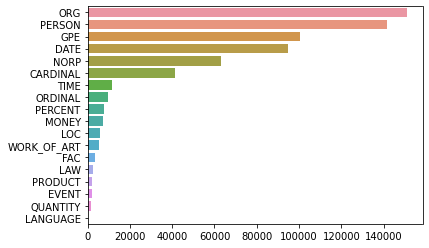

In [15]:
print("most used entities in entire dataset:")
plot_named_entity_barchart(df['content'])

In [16]:
#print("\nmost used entities in right leaning dataset:")
#plot_named_entity_barchart(df_right['content'])

In [17]:
#print("\nmost used entities in centered dataset:")
#plot_named_entity_barchart(df_center['content'])

In [18]:
#print("\nmost used entities in left leaning dataset:")
#plot_named_entity_barchart(df_left['content'])

Lets see the most common tokens of the entire dataset as well as the right, center, and left

In [19]:
#Credit: 6.1-most_common_named_entity_barchart
#method to print out most common token in a dataframe
def plot_most_common_named_entity_barchart(text, entity="PERSON"):
    nlp = spacy.load("en_core_web_sm")
    
    def _get_ner(text,ent):
        doc=nlp(text)
        return [X.text for X in doc.ents if X.label_ == ent]

    entity_filtered=text.apply(lambda x: _get_ner(x,entity))
    entity_filtered=[i for x in entity_filtered for i in x]
    
    counter=Counter(entity_filtered)
    x,y=map(list,zip(*counter.most_common(10)))
    sns.barplot(x=y, y=x).set_title(entity)

### Most common ORG & PERSON for overall dataset

In [20]:
#print("Most common token for ORG in the overall dataset is:")
#plot_most_common_named_entity_barchart(df['content'], entity="ORG")

In [21]:
#print("Most common token for PERSON in the overall dataset is:")
#plot_most_common_named_entity_barchart(df['content'], entity="PERSON")

### Most common ORG & PERSON for right leaning dataset

In [22]:
#print("Most common token for ORG in the right leaning dataset is:")
#plot_most_common_named_entity_barchart(df_right['content'], entity="ORG")

In [23]:
#print("Most common token for PERSON in the right leaning dataset is:")
#plot_most_common_named_entity_barchart(df_center['content'], entity="PERSON")

### Most common ORG & PERSON for centered dataset

In [24]:
#print("Most common token for ORG in the center leaning dataset is:")
#plot_most_common_named_entity_barchart(df_center['content'], entity="ORG")

In [25]:
#print("Most common token for PERSON in the center leaning dataset is:")
#plot_most_common_named_entity_barchart(df_center['content'], entity="PERSON")

### Most common ORG & PERSON for left leaning dataset

In [26]:
#print("Most common token for ORG in the left leaning dataset is:")
#plot_most_common_named_entity_barchart(df_left['content'], entity="ORG")

In [27]:
#print("Most common token for PERSON in the left leaning dataset is:")
#plot_most_common_named_entity_barchart(df_left['content'], entity="PERSON")

# Part II
Before creating the Random Forest model, we have to vectorize our tokens. Our choice of vectorizing will be Tfidf.

In [28]:
# load in libraries to vectorize data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()

In [29]:
# make clean text for our train data
df_train['textclean']= df['tokens'].apply(lambda x: ' '.join(x))
df_train.head()

,allsides_bias,content,tokens_raw,tokens,label,textclean
3082,From the Left,"Preet Bharara, the U.S. attorney for the South...","[Preet, Bharara, ,, U.S., attorney, Southern, ...","[Preet, Bharara, ,, U.S., attorney, Southern, ...",2,"Preet Bharara , U.S. attorney Southern Distric..."
6474,From the Right,Both sides are far apart in the partial suspen...,"[Both, sides, far, apart, partial, suspension,...","[Both, side, far, apart, partial, suspension, ...",0,Both side far apart partial suspension governm...
790,From the Center,Sen. Cory BookerCory Anthony BookerTed Lieu en...,"[Sen., Cory, BookerCory, Anthony, BookerTed, L...","[Sen., Cory, BookerCory, Anthony, BookerTed, L...",1,Sen. Cory BookerCory Anthony BookerTed Lieu en...
113,From the Left,Washington (CNN)Progress in talks to reopen th...,"[Washington, (, CNN, ), Progress, talks, reope...","[Washington, (, CNN, ), Progress, talk, reopen...",2,Washington ( CNN ) Progress talk reopen govern...
7631,From the Right,(EDITOR’S NOTE — An occasional look at politic...,"[(, EDITOR, ’, S, NOTE, —, An, occasional, loo...","[(, EDITOR, ’, S, NOTE, —, An, occasional, loo...",0,( EDITOR ’ S NOTE — An occasional look politic...


In [30]:
#vectorize the textclean data for our training data
X_train= vectorizer.fit_transform(df_train['textclean']).toarray()
print(f"X_train.shape = {X_train.shape}")
type(X_train)

X_train.shape = (6220, 48947)


numpy.ndarray

In [31]:
#using numpy conver y labels to a numpy data type
y_train = df_train.allsides_bias.to_numpy()
#y_train[:1]

In [32]:
#load libraries for model and confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import RandomForestClassifier

#initialize model
model= RandomForestClassifier(n_estimators=25)

In [33]:
#fit data onto model
model= model.fit(X_train, y_train)

In [34]:
# predict on X training data, itself
predictions_train= model.predict(X_train)
predictions_train

array(['From the Left', 'From the Right', 'From the Center', ...,
       'From the Left', 'From the Left', 'From the Left'], dtype=object)

accuracy (on X_train): 0.9986


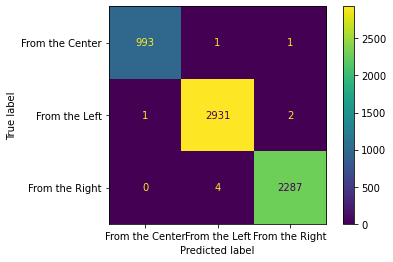

In [35]:
# fit as well as display confusion matrix
disp= ConfusionMatrixDisplay(confusion_matrix(df_train['allsides_bias'], predictions_train),\
    display_labels=['From the Center', 'From the Left', 'From the Right'])
disp.plot()
print(f"accuracy (on X_train): {accuracy_score(y_train, predictions_train):.4f}")

In [36]:
df_test['textclean'] = df_test['tokens'].apply(lambda x: ' '.join(x))
X_test = vectorizer.transform(df_test['textclean']).toarray()
X_test.shape

(1555, 48947)

accuracy (on X_test): 0.7113


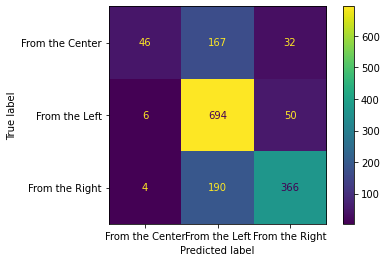

In [37]:
predictions_test = model.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix(df_test['allsides_bias'], predictions_test), display_labels=['From the Center','From the Left', 'From the Right'])
disp.plot()
print(f"accuracy (on X_test): {accuracy_score(df_test['allsides_bias'], predictions_test):.4f}")

In [38]:
df.head()

,allsides_bias,content,tokens_raw,tokens,label
0,From the Right,Obama administration alum Roger Fisk and Repub...,"[Obama, administration, alum, Roger, Fisk, Rep...","[Obama, administration, alum, Roger, Fisk, Rep...",0
1,From the Center,WASHINGTON – President Donald Trump took a swi...,"[WASHINGTON, –, President, Donald, Trump, took...","[WASHINGTON, –, President, Donald, Trump, take...",1
2,From the Right,Acting White House chief of staff Mick Mulvane...,"[Acting, White, House, chief, staff, Mick, Mul...","[Acting, White, House, chief, staff, Mick, Mul...",0
3,From the Right,President Trump repeated his vow Friday to dec...,"[President, Trump, repeated, vow, Friday, decl...","[President, Trump, repeat, vow, Friday, declar...",0
4,From the Center,President Donald Trump has yielded to politica...,"[President, Donald, Trump, yielded, political,...","[President, Donald, Trump, yield, political, p...",1


In [39]:
#credit to nb_C_airline_tweets
from sklearn.metrics import log_loss

# A function to create and fit a RF with a specific number of trees
def fitRFModel(hyperparam_value):
    rf_model = RandomForestClassifier(n_estimators=hyperparam_value, random_state=5)
    #rf_model = RandomForestClassifier(min_samples_split=hyperparam_value, random_state=1)
    rf_model.fit(X_train, y_train)
    y_train_pred_prob = rf_model.predict_proba(X_train)
    y_train_pred = rf_model.predict(X_train)
    y_val_pred_prob = rf_model.predict_proba(X_test)
    y_val_pred = rf_model.predict(X_test)
    train_loss = log_loss(df_train['allsides_bias'], y_train_pred_prob, labels=['From the Center','From the Left', 'From the Right']) #, F.binary_cross_entropy(torch.tensor(y_train_pred), torch.tensor(y_train.to_numpy().astype(float)), reduction="mean")
    train_acc = accuracy_score(df_train['allsides_bias'], y_train_pred)
    val_loss = log_loss(df_test['allsides_bias'], y_val_pred_prob, labels=['From the Center','From the Left', 'From the Right']) #F.binary_cross_entropy(torch.tensor(y_val_pred), torch.tensor(y_val.to_numpy().astype(float)), reduction="mean")
    val_acc = accuracy_score(df_test['allsides_bias'], y_val_pred)
    #return((train_loss.item(), val_loss.item()))
    return (train_loss, val_loss, train_acc, val_acc)


In [40]:
# Possible values of min_samples_split are 10 to 70 (by 5)
hyp_param_vals = list(range(5,150,5))
#hyp_param_vals = [5] + list(range(10,201,10))
metrics = []
for hp in hyp_param_vals:
    print(f"round of {hp} out of 151 complete")
    metrics.append((fitRFModel(hp)))

round of 5 out of 151 complete
round of 10 out of 151 complete
round of 15 out of 151 complete
round of 20 out of 151 complete
round of 25 out of 151 complete
round of 30 out of 151 complete
round of 35 out of 151 complete
round of 40 out of 151 complete
round of 45 out of 151 complete
round of 50 out of 151 complete
round of 55 out of 151 complete
round of 60 out of 151 complete
round of 65 out of 151 complete
round of 70 out of 151 complete
round of 75 out of 151 complete
round of 80 out of 151 complete
round of 85 out of 151 complete
round of 90 out of 151 complete
round of 95 out of 151 complete
round of 100 out of 151 complete
round of 105 out of 151 complete
round of 110 out of 151 complete
round of 115 out of 151 complete
round of 120 out of 151 complete
round of 125 out of 151 complete
round of 130 out of 151 complete
round of 135 out of 151 complete
round of 140 out of 151 complete
round of 145 out of 151 complete


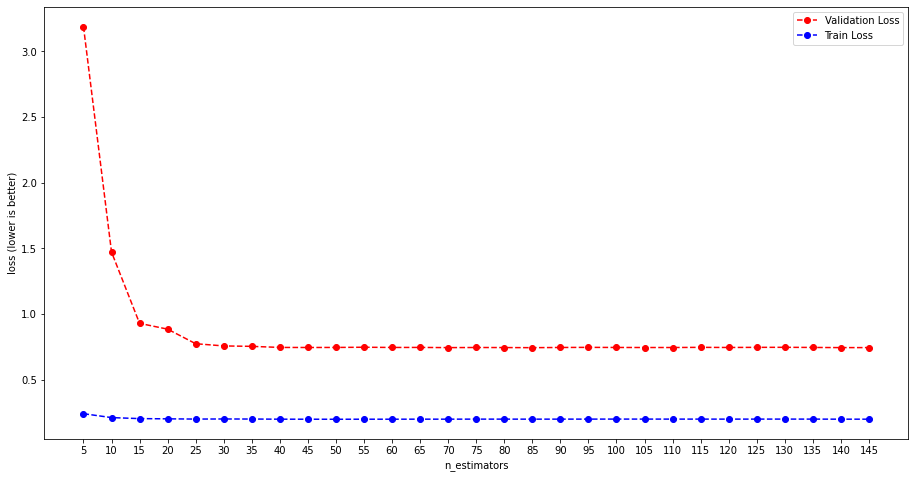

In [41]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0, 0, 1, 1]) #.1, 0.1, 0.8, 0.8]) # main axes
ax.plot(hyp_param_vals, [metric[1] for metric in metrics], '--ro') # validattion loss
ax.plot(hyp_param_vals, [metric[0] for metric in metrics], '--bo') # training loss
ax.legend(["Validation Loss", "Train Loss"], loc=1)
ax.set_xticks(hyp_param_vals)
ax.set(xlabel="n_estimators", ylabel="loss (lower is better)")
plt.show()

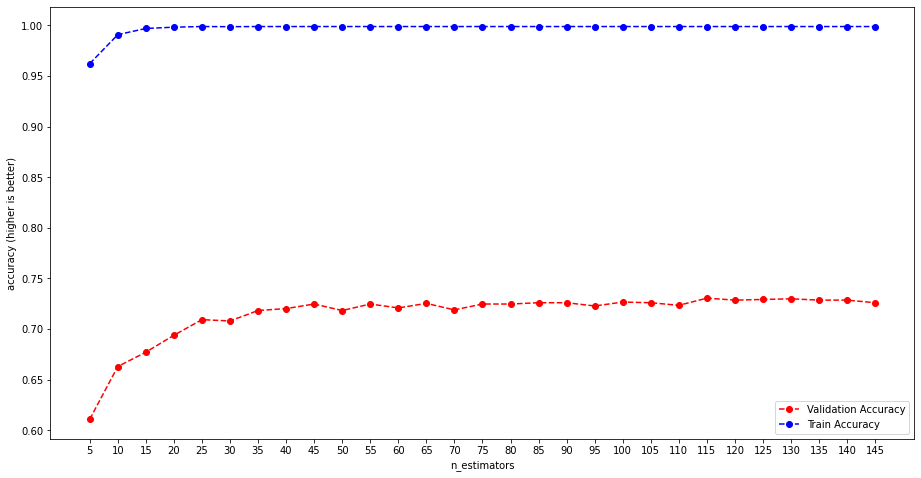

In [42]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0, 0, 1, 1]) #.1, 0.1, 0.8, 0.8]) # main axes
ax.plot(hyp_param_vals, [metric[3] for metric in metrics], '--ro') # validattion accuracy
ax.plot(hyp_param_vals, [metric[2] for metric in metrics], '--bo') # training accuracy
ax.legend(["Validation Accuracy", "Train Accuracy"], loc=4)
ax.set_xticks(hyp_param_vals)
ax.set(xlabel="n_estimators", ylabel="accuracy (higher is better)")
plt.show()

In [43]:
model= RandomForestClassifier(n_estimators=115, random_state=5)
model= model.fit(X_train, y_train)
predictions_train= model.predict(X_train)
predictions_train

array(['From the Left', 'From the Right', 'From the Center', ...,
       'From the Left', 'From the Left', 'From the Left'], dtype=object)

accuracy (on X_train): 0.9989


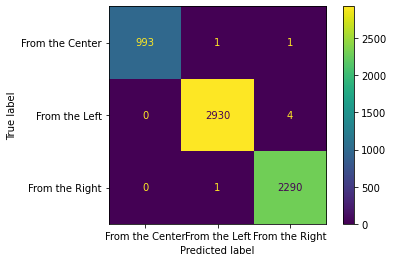

In [44]:
# fit as well as display confusion matrix
disp= ConfusionMatrixDisplay(confusion_matrix(df_train['allsides_bias'], predictions_train),\
    display_labels=['From the Center', 'From the Left', 'From the Right'])
disp.plot()
print(f"accuracy (on X_train): {accuracy_score(y_train, predictions_train):.4f}")

In [45]:
#TODO:: CHECK DATA TYPE FOR PREDCTIONS_TRAIN
print(type(predictions_train))

<class 'numpy.ndarray'>


In [46]:
predictions_train

array(['From the Left', 'From the Right', 'From the Center', ...,
       'From the Left', 'From the Left', 'From the Left'], dtype=object)

accuracy (on X_test): 0.7305


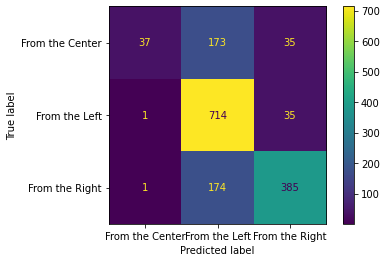

In [47]:
predictions_test = model.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix(df_test['allsides_bias'], predictions_test), display_labels=['From the Center','From the Left', 'From the Right'])
disp.plot()
print(f"accuracy (on X_test): {accuracy_score(df_test['allsides_bias'], predictions_test):.4f}")

## Part III

In [48]:
#load the libraries needed to use deep learning
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification,  TrainingArguments, Trainer
from datasets import Dataset, load_metric

### MODEL CREDIT
title = "POLITICS: Pretraining with Same-story Article Comparison for Ideology Prediction and Stance Detection",
author = "Liu, Yujian and
Zhang, Xinliang Frederick and Wegsman, David and Beauchamp, Nicholas and Wang, Lu" booktitle = "Findings of the Association for Computational Linguistics: NAACL 2022",
year = "2022",

We will be using a pretrained model transformer. This model has political bias integration.

In [49]:
#choose model and set up autotokenizer
MODEL_NAME= "launch/POLITICS"
MAX_LENGTH=100

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3, max_length=MAX_LENGTH, output_attentions=False, output_hidden_states=False)

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/672 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

Some weights of the model checkpoint at launch/POLITICS were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at launch/POLITICS and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight']
You sho

Process data to ds to fit into transformer

In [50]:
#Convert dataframe train to dataset
ds_raw= Dataset.from_pandas(df_train[['label','content']])
#tokenize the data
def tokenize_function(text):
    return tokenizer(text['content'], padding="max_length", truncation= True, max_length=MAX_LENGTH)

ds= ds_raw.map(tokenize_function, batched=True)

  0%|          | 0/7 [00:00<?, ?ba/s]

In [51]:
ds[0]

{'label': 2,
 'content': 'Preet Bharara, the U.S. attorney for the Southern District of New York, and one of the most high profile federal prosecutors in the country, says he’s been fired after refusing to resign his post.\nI did not resign. Moments ago I was fired. Being the US Attorney in SDNY will forever be the greatest honor of my professional life.\nIn a full statement Saturday, Bharara reiterated that he had been fired.\n“One hallmark of justice is absolute independence, and that was my touchstone everyday I served,” he said.\nBharara: "Hallmark of justice is absolute independence."\nI see why he was fired (1/2) pic.twitter.com/A4vIpUCX8R\nCNN’s Jake Tapper reported that Acting Deputy Attorney General Dana Boente had called Bharara Saturday to dismiss him.\nActing deputy Attorney General Dana Boente just called US Attorney Preet Bharara and told him President Trump was firing him.\nThe Department of Justice asked the nation’s 46 federal prosecutors to resign on Friday, something

In [52]:
#split to train and evaluation
train_prop= .85
ds_train= ds.select(range(int(len(ds)*train_prop)))
ds_eval= ds.select(range(int(len(ds)*train_prop), len(ds)))

In [53]:
print(f"len(ds_train)= {len(ds_train)}")
print(f"len(ds_train)= {len(ds_eval)}")

len(ds_train)= 5287
len(ds_train)= 933


### Train the model

In [54]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [55]:
import numpy as np
from pynvml import *

In [56]:
#get metric
metric= load_metric("accuracy")

#use trainer to train
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)


training_args = TrainingArguments(num_train_epochs= 4, 
                                      do_train=True,
                                      report_to=None,
                                      output_dir="/kaggle/working",
                                      evaluation_strategy="steps",
                                      eval_steps=500,
                                      per_device_train_batch_size=10,
                                      per_device_eval_batch_size=10,
                                      load_best_model_at_end= True)

trainer = Trainer(model = model, 
                      args = training_args,
                      train_dataset = ds_train, 
                      eval_dataset = ds_eval,
                      compute_metrics = compute_metrics)

torch.set_grad_enabled(True)
trainer.train()
trainer.evaluate()

Using the `WAND_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
The following columns in the training set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: content, __index_level_0__. If content, __index_level_0__ are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 5287
  Num Epochs = 4
  Instantaneous batch size per device = 10
  Total train batch size (w. parallel, distributed & accumulation) = 10
  Gra

Step,Training Loss,Validation Loss,Accuracy
500,0.632400,0.560684,0.773848
1000,0.385500,0.660113,0.780279
1500,0.211500,1.103789,0.795284
2000,0.129900,1.205531,0.792069


The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: content, __index_level_0__. If content, __index_level_0__ are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 933
  Batch size = 10
Saving model checkpoint to /kaggle/working/checkpoint-500
Configuration saved in /kaggle/working/checkpoint-500/config.json
Model weights saved in /kaggle/working/checkpoint-500/pytorch_model.bin
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: content, __index_level_0__. If content, __index_level_0__ are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 933
  Batch size = 10
Saving model checkpoint to /kaggle/working/check

{'eval_loss': 0.5606838464736938,
 'eval_accuracy': 0.7738478027867095,
 'eval_runtime': 3.3665,
 'eval_samples_per_second': 277.142,
 'eval_steps_per_second': 27.922,
 'epoch': 4.0}

### Test the model

In [57]:
df_test[['label','content']]

,label,content
2886,0,The speech will mark the beginning of Trump’s ...
4973,0,MILAN (AP) — An Italian coast guard ship heade...
7481,0,After a long struggle with medical and legal p...
2344,2,When Republicans rolled out their tax reform p...
4069,0,Campaigns team up to target upcoming primary s...
...,...,...
2253,2,"PTA president Janelle Jefferson and her son, J..."
6074,1,A boost to long-term investment in the US may ...
204,2,"It took over 200 attempts over 100 years, but ..."
912,1,The Federal Communications Commission (FCC) ha...


In [58]:
#convert df_test to ds_test
ds_test_raw= Dataset.from_pandas(df_test[['label','content']])
ds_test= ds_test_raw.map(tokenize_function, batched=True)
ds_test_raw[0]

  0%|          | 0/2 [00:00<?, ?ba/s]

{'label': 0,
 'content': 'The speech will mark the beginning of Trump’s tour across the Arab world, which begins on Friday and will be his first as president. It follows key in-person meetings this year with allied heads of state in the Muslim world to discuss the eradication of radical Islamic terrorism, notably Egyptian President Abdel Fattah al-Sisi and Jordanian King Abdullah II.\nMcMaster revealed that Trump will address leaders from 50 Muslim-majority countries, though he did not note which would specifically attend as he seeks to “deliver an inspiring but direct speech on the need to confront radical ideology and the president’s hopes for a peaceful vision of Islam to dominate across the world.”\nIn addition to his remarks, Trump will also “participate in the founding of a new center intended to fight radicalism and promote moderation” in Saudi Arabia, a country known for its strong links with radical Islam.\nTrump has already met with a number of Arab leaders to discuss the thr

In [59]:
#make predictions
preds= trainer.predict(test_dataset= ds_test)
test_preds = np.apply_along_axis(np.argmax, 1, preds.predictions)
len(test_preds)

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: content, __index_level_0__. If content, __index_level_0__ are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1555
  Batch size = 10


1555

In [60]:
#append  predicted labels to df_test
df_test['preds']= test_preds.tolist()
df_test['bias label']= df_test['preds'].apply(lambda x: class_idx2tok[x])
df_test.head()

,allsides_bias,content,tokens_raw,tokens,label,textclean,preds,bias label
2886,From the Right,The speech will mark the beginning of Trump’s ...,"[The, speech, mark, beginning, Trump, ’, tour,...","[The, speech, mark, begin, Trump, ’, tour, acr...",0,The speech mark begin Trump ’ tour across Arab...,2,From the Left
4973,From the Right,MILAN (AP) — An Italian coast guard ship heade...,"[MILAN, (, AP, ), —, An, Italian, coast, guard...","[MILAN, (, AP, ), —, An, Italian, coast, guard...",0,MILAN ( AP ) — An Italian coast guard ship hea...,0,From the Right
7481,From the Right,After a long struggle with medical and legal p...,"[After, long, struggle, medical, legal, proble...","[After, long, struggle, medical, legal, proble...",0,"After long struggle medical legal problems , R...",0,From the Right
2344,From the Left,When Republicans rolled out their tax reform p...,"[When, Republicans, rolled, tax, reform, propo...","[When, Republicans, roll, tax, reform, proposa...",2,When Republicans roll tax reform proposal week...,0,From the Right
4069,From the Right,Campaigns team up to target upcoming primary s...,"[Campaigns, team, target, upcoming, primary, s...","[Campaigns, team, target, upcoming, primary, s...",0,Campaigns team target upcoming primary state T...,0,From the Right


In [61]:
predictions= df_test['bias label'].to_numpy()

In [62]:
predictions

array(['From the Left', 'From the Right', 'From the Right', ...,
       'From the Left', 'From the Right', 'From the Right'], dtype=object)

Testing with test dataset

accuracy (on X_test): 0.7723


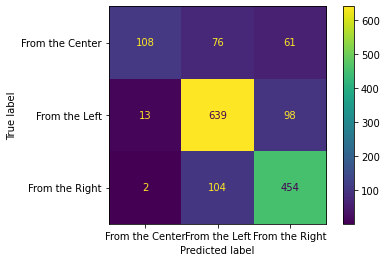

In [63]:
#check accuray w/ confusion matrix
#you can change to preds or test_preds

disp = ConfusionMatrixDisplay(confusion_matrix(df_test['allsides_bias'], predictions), display_labels=['From the Center','From the Left', 'From the Right'])
disp.plot()
print(f"accuracy (on X_test): {accuracy_score(df_test['allsides_bias'], predictions):.4f}")